In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import glob
from keras.preprocessing import image as kImage
from skimage.transform import pyramid_gaussian
from keras.models import load_model
import matplotlib.pyplot as plt
from my_upsampling_2d import MyUpSampling2D

Using TensorFlow backend.


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

---

In [4]:
def getData(input_path):
    X = []
    for p in input_path:
        x = kImage.load_img(p)
        x = kImage.img_to_array(x)
        X.append(x)
    X = np.asarray(X)

    s1 = X
    del X
    s2 = []
    s3 = []
    for x in s1:
        pyramid = tuple(pyramid_gaussian(x/255., max_layer=2, downscale=2))
        s2.append(pyramid[1]*255.)
        s3.append(pyramid[2]*255.)
    
    s2 = np.asarray(s2)
    s3 = np.asarray(s3)
    
    return [s1, s2, s3]

---

In [8]:
from PIL import Image

In [9]:
f = Image.open('RCNX1551.JPG')
f = f.resize((f.width // 2, f.height // 2))
f.save('RCNX1551_hf.JPG')

---

In [5]:
# get data
input_path = glob.glob('RCNX1551_hf.JPG')
data = getData(input_path)
print (data[0].shape, data[1].shape, data[2].shape)

(1, 720, 1024, 3) (1, 360, 512, 3) (1, 180, 256, 3)


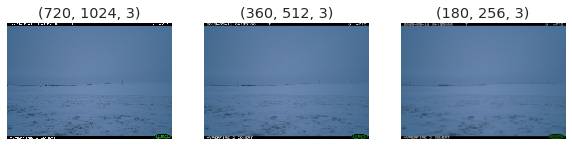

In [6]:
# plot last frame in 3 diff scales
num_in_row = 1
num_in_col = 3
frame_idx = 0 # display frame index

plt.rcParams['figure.figsize'] = (10.0, 7.0) # set figure size

for i in range(num_in_row * num_in_col):
    x = data[i][frame_idx]
    plt.subplot(num_in_row, num_in_col, i+1)
    plt.imshow(x.astype('uint8'))
    
    plt.title(x.shape)
    plt.axis('off')
    
plt.show()

In [7]:
# Segment on a single CPU for this test

# a sample FgSegNet_M model can be downloaded at https://drive.google.com/open?id=1KiEChAxuweEZHwqT5HrkTCbSjT9MxwUF
mdl_path = '../FgSegNet_M/Prudhoe/models200/mdl_prudhoe15.h5'

model = load_model(mdl_path, custom_objects={'MyUpSampling2D': MyUpSampling2D}, compile=False) # load the saved model that is trained with 50 frames
probs = model.predict(data, batch_size=1, verbose=1)
print(probs.shape) # (5, 240,320,1)
probs = probs.reshape([probs.shape[0], probs.shape[1], probs.shape[2]])
print(probs.shape) # (5, 240,320)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


1/1 [==============================] - 3s 3s/step
(1, 720, 1024, 1)
(1, 720, 1024)


(-0.5, 1023.5, 719.5, -0.5)

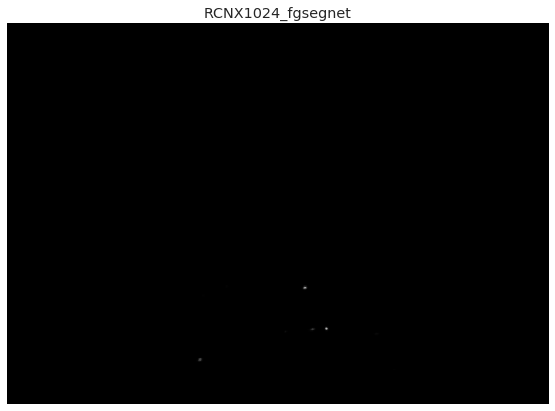

In [7]:
# plot the first segmentation mask
x = probs[frame_idx]

# plt.subplot(1, 1, 1)
# plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(x)

plt.title('RCNX1024_fgsegnet')
plt.axis('off')
# plt.savefig('RCNX1024_fgsegnet')
#plt.show()

(-0.5, 1023.5, 719.5, -0.5)

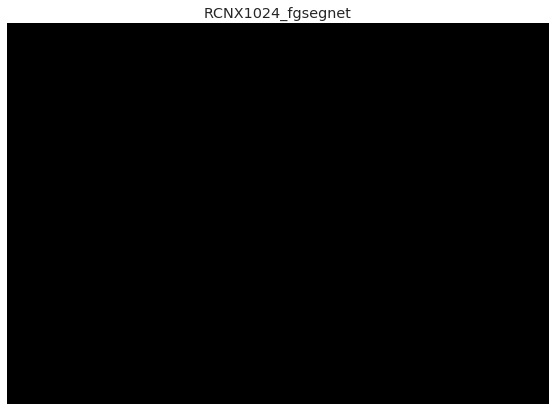

In [8]:
# Thresholding (one can specify any threshold values)
threshold = .8
x[x<threshold] = 0.
x[x>=threshold] = 1.

# plt.subplot(1, 1, 1)
# plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(x)

plt.title('RCNX1024_fgsegnet')
plt.axis('off')
# plt.savefig('RCNX1024_fgsegnet')
# plt.show()


In [68]:
# from PIL import Image

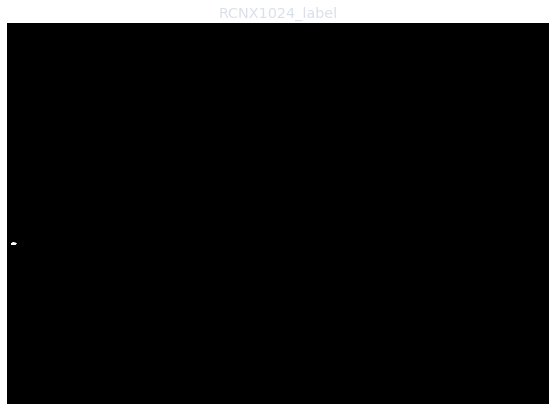

In [69]:
label = Image.open('../../prudhoe15_DS_dst_half/label/label_2019_100RECNX_RCNX1024.PNG')
plt.imshow(label)
plt.axis('off')
plt.title('RCNX1024_label')
plt.savefig('RCNX1024_label')
plt.show()